# Study, of kaggle with the main objective to predict price houses in the best way.

### Libs Imports

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import ipysheet
from project_modules import *
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)

### Data Load

In [2]:
ls

 O volume na unidade C não tem nome.
 O Número de Série do Volume é AE8F-DC6B

 Pasta de C:\Users\renal\Dropbox\Estudos\Data Science\kaggle-houseprices-challenge

21/04/2019  16:42    <DIR>          .
21/04/2019  16:42    <DIR>          ..
16/04/2019  23:44    <DIR>          .ipynb_checkpoints
07/04/2019  21:55    <DIR>          .vscode
21/04/2019  16:37    <DIR>          __pycache__
11/04/2019  16:34            13.372 data_description.txt
07/04/2019  21:45             1.096 LICENSE
21/04/2019  16:36               547 project_modules.py
07/04/2019  21:51             3.845 README.md
28/11/2018  21:31            31.939 sample_submission.csv
21/04/2019  16:42           487.949 Study.ipynb
28/11/2018  21:31           451.405 test.csv
28/11/2018  21:31           460.676 train.csv
15/04/2019  19:49            14.858 Variable Analysis.xlsx
               9 arquivo(s)      1.465.687 bytes
               5 pasta(s)   33.200.574.464 bytes disponíveis


In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


### Exploratory Data Analysis

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [6]:
full_data = pd.concat([df_train,df_test],sort=False)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [7]:
pd.concat([full_data.head(10),full_data.tail(10)],sort=False)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,

## Variable Expectation Analysis.

### Classify variables in the Expectation Influence in the model. 

### The variables classified with a High level of Expected Influences:

I found some variables, that I want to analyse more deeply to understand the problem

| Index | Variable          | Type        | Segment  | Description                                                     | Expec. Influ |
|-------|-------------------|-------------|----------|-----------------------------------------------------------------|--------------|
| 2     | MSZoning          | Categorical | Location | Identifies the general zoning classification of the sale        | High         |
| 4     | LotArea           | Numerical   | Space    | Lot size in square feet                                         | High         |
| 5     | Street            | Categorical | Location | TYPE OF Road Access to Property                                 | High         |
| 6     | Alley             | Categorical | Location | Type of Alley access to property                                | High         |
| 9     | Utilities         | Categorical | Building | Type of Utilities Available                                     | High         |
| 11    | LandSlope         | Categorical | Space    | Slope of property                                               | High         |
| 12    | Neighborhood      | Categorical | Location | Physical location within Ames City limits                       | High         |
| 17    | OverallQual       | Numerical   | Building | Rates the overall material and finish of the house              | High         |
| 18    | OverallCond       | Numerical   | Building | Rates the overall condition of the ouse                         | High         |
| 27    | ExterQual         | Categorical | Building | Evaluates the quality of the material on the exterior           | High         |
| 28    | ExterCond         | Categorical | Building | Evaluates the present condition of the material on the exterior | High         |
| 38    | TotalBsmtSF       | Numerical   | Building | Total square feet of basement area                              | High         |
| 39    | Heating           | Categorical | Building | Type of Heating                                                 | High         |
| 40    | HeatingQC         | Categorical | Building | Heating quality and condition                                   | High         |
| 41    | CentralAir        | Categorical | Building | Central Air Conditioning                                        | High         |
| 43    | 1sfFlrSF          | Numerical   | Building | First Floor Square Feet                                         | High         |
| 44    | 2ndFlrSF          | Numerical   | Building | Second Floor Square Feet                                        | High         |
| 46    | GrLivArea         | Numerical   | Building | Above grade (ground) living are square feet                     | High         |
| 49    | FullBath          | Numerical   | Building | Full bathrooms above grade                                      | High         |
| 51    | BedroomAbvGr      | Numerical   | Building | Bedrooms above grade                                            | High         |
| 53    | KitchenQual       | Categorical | Building | Kitchen Quality                                                 | High         |
| 54    | TotRmsAbvGrd      | Numerical   | Building | Total Rooms above grade (does not include bathrooms)            | High         |
| 55    | Functional        | Categorical | Building | Home Functionality                                              | High         |
| 60    | GarageFinish      | Categorical | Building | Interior finish of the garage                                   | High         |
| 61    | GarageCars        | Numerical   | Building | Number of cars in garage                                        | High         |
| 62    | GarageArea        | Numerical   | Building | Area of the the garage                                          | High         |
| 63    | GarageQual        | Categorical | Building | Garage Quality                                                  | High         |
| 64    | GarageCond        | Categorical | Building | Garage Condition                                                | High         |
| 65    | PavedDrive        | Categorical | Building | Paved Driveway                                                  | High         |
| 72    | PoolQC            | Numerical   | Building | Pool Quality                                                    | High         |
| 74    | MiscFeature       | Categorical | Building | Miscellaneous feature note covered in other categories          | High         |

Lets, check the correlation between theses variables and the target variable.
In the next, cell we will get the variables from an excel relationship.



In [8]:
df_variables = pd.read_excel('Variable Analysis.xlsx',header=0)
main_variables = df_variables[df_variables['Expec. Influ']=='High']
target_variable = list(df_variables[df_variables['Expec. Influ']=='Target'].Variable)

### Relationing the Variables with the Target Variables

In [9]:
main_variables[['Variable','Type']].T

,1,3,4,5,8,10,11,16,17,26,27,37,38,39,40,42,43,45,48,50,52,53,54,59,60,61,62,63,64,71,73
Variable,MSZoning,LotArea,Street,Alley,Utilities,LandSlope,Neighborhood,OverallQual,OverallCond,ExterQual,ExterCond,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,MiscFeature
Type,Categorical,Numerical,Categorical,Categorical,Categorical,Categorical,Categorical,Numerical,Numerical,Categorical,Categorical,Numerical,Categorical,Categorical,Categorical,Numerical,Numerical,Numerical,Numerical,Numerical,Categorical,Numerical,Categorical,Categorical,Numerical,Numerical,Categorical,Categorical,Categorical,Numerical,Categorical


In [10]:
#Getting the two types of variables
all_variables = list(main_variables.Variable)
numerical_variables = list(main_variables[main_variables['Type']=='Numerical'].Variable)
categorical_variable = list(main_variables[main_variables['Type']=='Categorical'].Variable)
del df_variables,main_variables

#### Numerical Variables

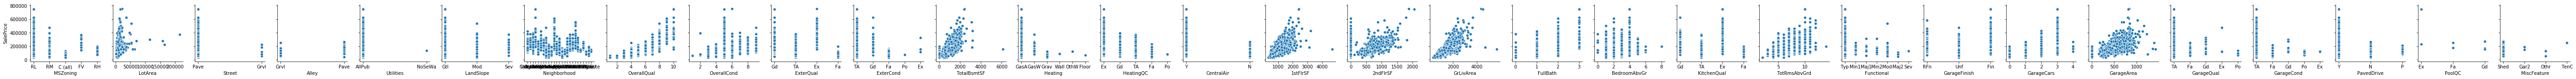

In [11]:
sns.pairplot(df_train[target_variable+all_variables],x_vars=all_variables,y_vars=target_variable)

### Conclusions About Relationship between target variables and conditionals.

1. MSZoning: Residential Low Density has higher values than anothers, commercial zones are has the lowest prices. - Check this realtionship with LotArea
2. LotArea: has a nice influency, probally but isn't a linear, probally has influence of anothers variables. - Check with MSZoning and neighborhood. 
3. Street: pave roads obviuslly has a higher value. 
4. Alley has an influence, but by the distribution hasn't so much values.  - Check Distribution to see if will remain.
5. Utilities, by the distribution the majority of the values has All Public itilities. 
6. LandSlope: Gentle slope has nicer values.
7. Neighborhood: Has influence, but has some outliers. 
8. OverallQual: Obviuslly hhas a exponential increase in the salesprice. 
9. OverallCond: The overall condition of the house, has influence, in his majority has an average quality. And the most expensive houses are in this rate. Average. 
10. ExterQual: Good Influence, should be used with dummys. 
11. ExtercOND: Has influence. Categorical. 
12. TotalBsmtSF: Exponential increase of the saleprice for the Total Square Feet Basement, has outliers. 
13. Heating: Type of heating has nice influency. 
14. Central air: Has an influence. 
15. 1StFlrSF: Exponential, check relationship with LotArea, Zoning and Neighborhood. - Look Closer
16. 2ndFlrSF: Alot of places, don't have 2ndFloor, check distribution . - Look Closer
17. GrLivAra: Exponential relationship. - Look Closer 
18. FullBath:Great Influence. - Check Distribution
19. BedroomAbvGr: Bedrooms above ground, has a nice influency in the price, but the houses with more bedrooms aren't necessarily more expensive. - Check the row with the highest number of bedrooms
20. KitchenQual: Kitchen quality has a great influence in the price of the house.
21. TotRmmsAbvGrd: Total rooms of the house above the ground , is an exponential relationship, but has some outliers. - CHeck Outliers
22. Functional: Has an influency, but don't so much
23. GarageFinish:Great Influence in the price. 
24. GarageCards: Great influency, but the house with the biggest capacity, not necessarily are the most expensive. 
25. GarageArea: Great relationship with the price. 
26. GarageQuality: Average has the most expensive prices. 
27. PavedDrive: Nice Influency.
28. PoolQC: Too low values to be considere as a feature to the model. 
29. MiscFeature: Too low values to be considered as a feature to the model. 


### Let's check the count of each variable in the dataset.

In [12]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
df_train[target_variable+all_variables].count()

SalePrice       1460
MSZoning        1460
LotArea         1460
Street          1460
Alley             91
Utilities       1460
LandSlope       1460
Neighborhood    1460
OverallQual     1460
OverallCond     1460
ExterQual       1460
ExterCond       1460
TotalBsmtSF     1460
Heating         1460
HeatingQC       1460
CentralAir      1460
1stFlrSF        1460
2ndFlrSF        1460
GrLivArea       1460
FullBath        1460
BedroomAbvGr    1460
KitchenQual     1460
TotRmsAbvGrd    1460
Functional      1460
GarageFinish    1379
GarageCars      1460
GarageArea      1460
GarageQual      1379
GarageCond      1379
PavedDrive      1460
PoolQC             7
MiscFeature       54
dtype: int64

In [14]:
#Removing Variables with low counts.
all_variables.remove('Alley')
all_variables.remove('PoolQC')
all_variables.remove('MiscFeature')

### Checking the Distribution of some Variables:
Utilities
2sdFloorSF
LotArea

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Utilities,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AllPub,1459,1459,1459,1201,1459,1459,91,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1451,1451,1459,1459,1459,1422,1422,1421,1422,1459,1421,1459,1459,1459,1459,1459,1459,1458,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,769,1378,1378,1378,1459,1459,1378,1378,1459,1459,1459,1459,1459,1459,1459,7,281,54,1459,1459,1459,1459,1459,1459
NoSeWa,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1


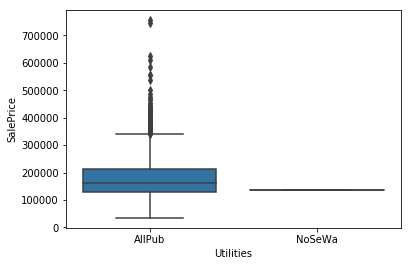

In [15]:
sns.boxplot(data=df_train,x='Utilities',y='SalePrice')
df_train.groupby(by='Utilities').count()

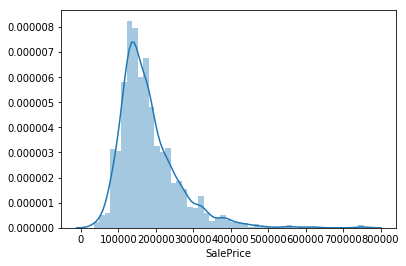

In [16]:
sns.distplot(df_train['SalePrice'])
df_train['SalePrice'].describe()
#Descondier Utilities
all_variables.remove('Utilities')

In [17]:
df_train['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

### Because little variance in Street variable, disconsider too

In [26]:
all_variables.remove('Street')

ValueError: list.remove(x): x not in list

### Checking correlation matrix

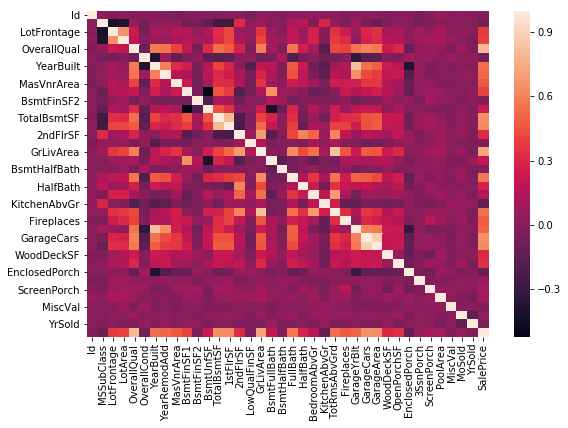

In [59]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(df_train.corr())

### Seeing Correlations
Garage has a nice influence, and we already consider it in our variables.
WoodDeckSF should be considered in our model.
OverallQuality too
2snFloor Square feet
Total Basement
YearBuild too


In [ ]:
all_variables.append(['YearBuild','WoodDeckSF','Fireplaces'])